In [1]:
import numpy as np
import time

In [1]:
import torch
#run LoadDataIter

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torchvision.transforms as transforms

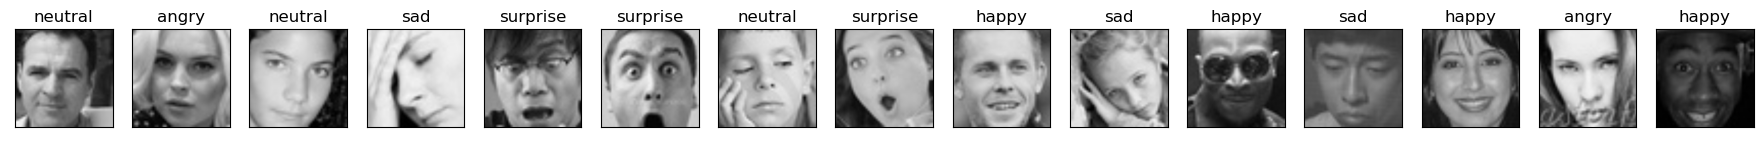

In [3]:
file = '/Users/wangfuyu/Desktop/APS360Project/APS360/APS360Data/BlackWhite/test'

Transformaions = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData1 = torch.utils.data.DataLoader(FinalData, batch_size=2000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData1)

imagesBWT, labelsBWT = LoadDataIter.__next__()
imagesBWT = imagesBWT.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.set_title(classifications[labelsBWT[i]])
    plt.imshow(imagesBWT[i].transpose(1, 2, 0))


plt.show()

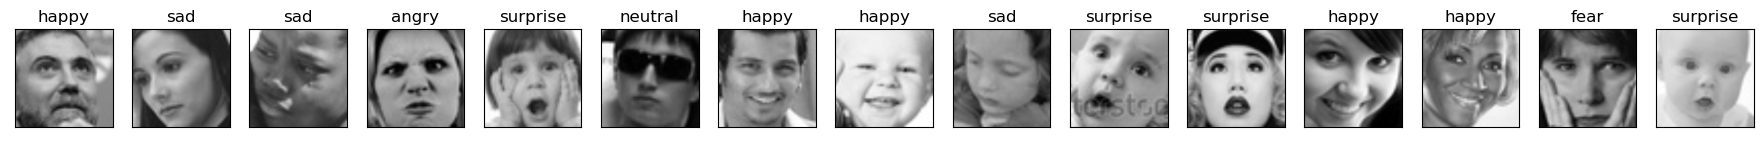

In [4]:
file = '/Users/wangfuyu/Desktop/APS360Project/APS360/APS360Data/BlackWhite/train'

Transformaions = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData2 = torch.utils.data.DataLoader(FinalData, batch_size=2000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData2)

imagesBWR, labelsBWR = LoadDataIter.__next__()
imagesBWR = imagesBWR.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.set_title(classifications[labelsBWR[i]])
    plt.imshow(imagesBWR[i].transpose(1, 2, 0))


plt.show()

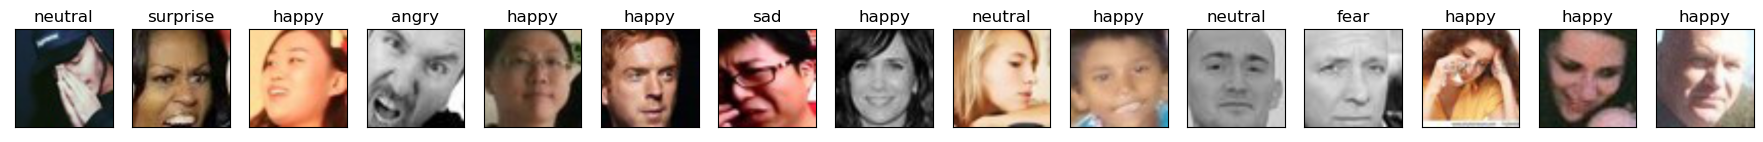

In [5]:
file = '/Users/wangfuyu/Desktop/APS360Project/APS360/APS360Data/Colorful/test'

Transformaions = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData3 = torch.utils.data.DataLoader(FinalData, batch_size=2000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData3)

imagesCT, labelsCT = LoadDataIter.__next__()
imagesCT = imagesCT.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.set_title(classifications[labelsCT[i]])
    plt.imshow(imagesCT[i].transpose(1, 2, 0))


plt.show()

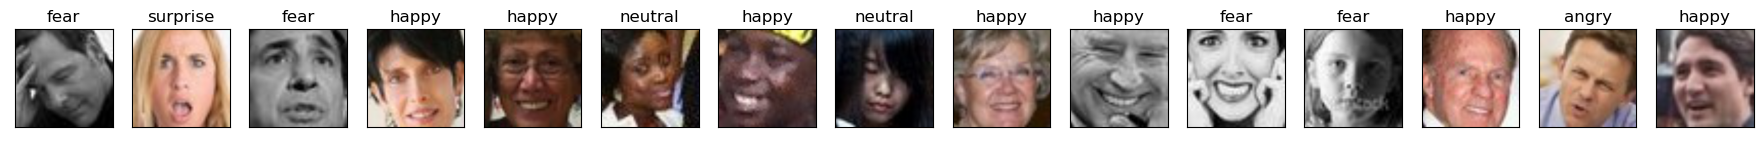

In [6]:
file = '/Users/wangfuyu/Desktop/APS360Project/APS360/APS360Data/Colorful/train'

Transformaions = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData4 = torch.utils.data.DataLoader(FinalData, batch_size=2000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData4)

imagesCR, labelsCR = LoadDataIter.__next__()
imagesCR = imagesCR.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.set_title(classifications[labelsCR[i]])
    plt.imshow(imagesCR[i].transpose(1, 2, 0))


plt.show()

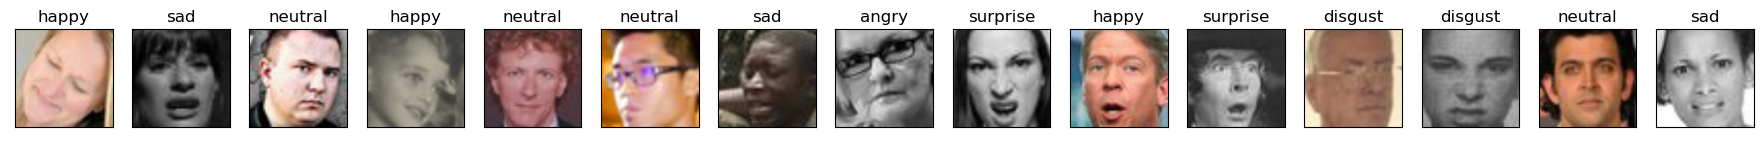

In [7]:
file = '/Users/wangfuyu/Desktop/APS360Project/APS360/APS360Data/Colorful/valid'

Transformaions = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])

FinalData = torchvision.datasets.ImageFolder(file, transform=Transformaions)

LoadData5 = torch.utils.data.DataLoader(FinalData, batch_size=2000, num_workers=2, shuffle=True)
LoadDataIter = iter(LoadData5)

imagesCV, labelsCV = LoadDataIter.__next__()
imagesCV = imagesCV.numpy()

classifications = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

fig = plt.figure(figsize=(30, 8))
for i in range(15):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.set_title(classifications[labelsCV[i]])
    plt.imshow(imagesCV[i].transpose(1, 2, 0))


plt.show()

In [10]:
from torch.utils.data import ConcatDataset 
from torch.utils.data import DataLoader

# Assuming you have five data loaders: loader1, loader2, loader3, loader4, and loader5 

# Combine the datasets from the data loaders 
combined_dataset = ConcatDataset([LoadData1.dataset,LoadData2.dataset,LoadData3.dataset,LoadData4.dataset, LoadData5.dataset]) 
# Create a data loader using the combined dataset 
combined_dataloader = DataLoader(combined_dataset, batch_size=2000, num_workers=2, shuffle=True)

LoadDataIter = iter(combined_dataloader)
images, labels = LoadDataIter.__next__()
images = images.numpy()

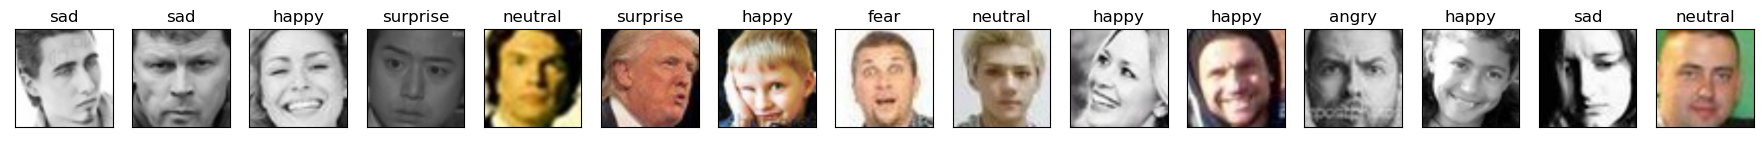

In [11]:
fig = plt.figure(figsize=(30, 8))
for i in range(15):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.set_title(classifications[labels[i]])
    plt.imshow(images [i].transpose(1, 2, 0))


plt.show()
